<a href="https://colab.research.google.com/github/MonkeyDMemo/ML_churn/blob/main/Examen_ML_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn import metrics

import matplotlib.pyplot as plt 
import seaborn as sns  

In [ ]:
dataset= pd.read_csv('/content/drive/MyDrive/Diplomado/Examen/data.csv',index_col=[0], sep=',')

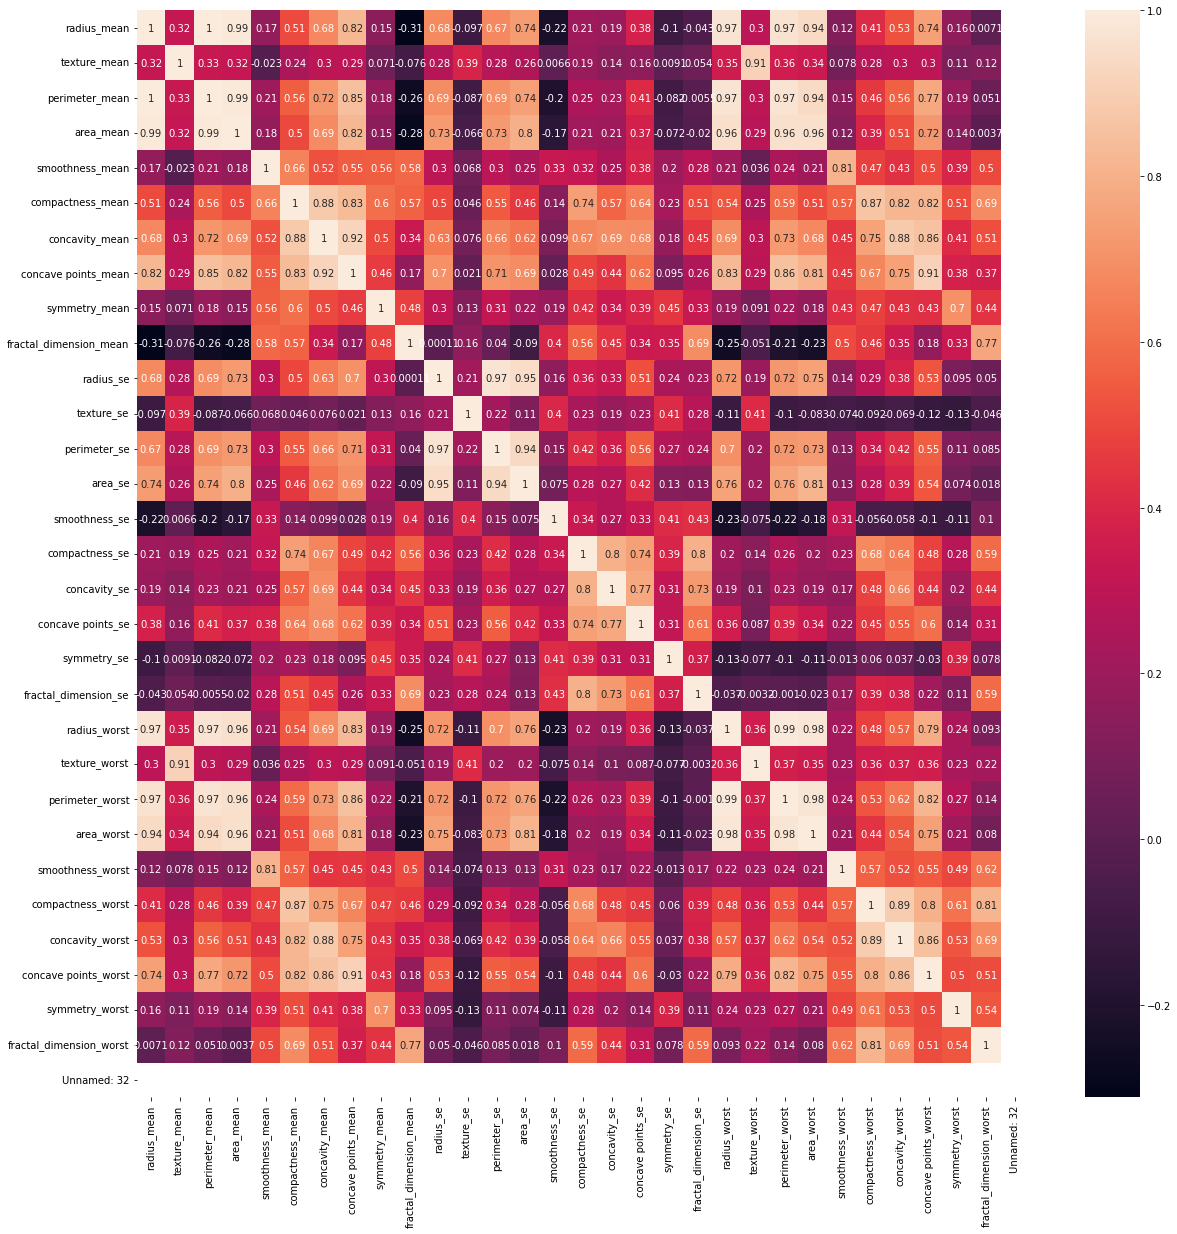

In [ ]:
#Correlation matrix
correlation = dataset.drop(columns=['diagnosis']).corr()
#Plot heatmap of correlation
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlation, annot=True, ax=ax);

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e54a02910>,
      dtype=object)

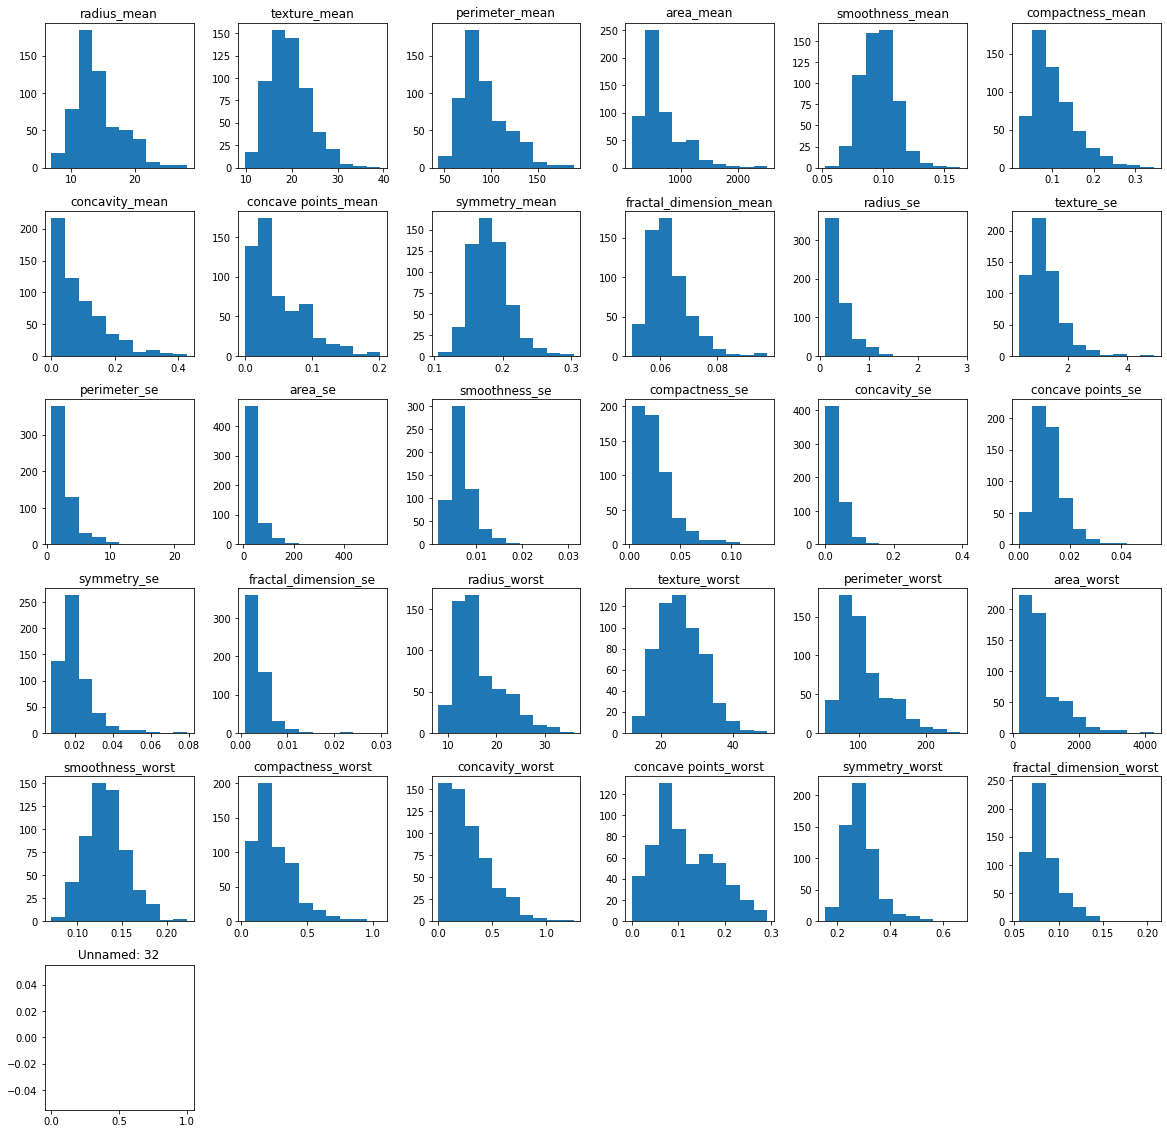

In [ ]:
dataset.hist(bins=10,figsize=(20,20),grid=False)

In [ ]:
dataset.head()
#dataset.info()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
#dataset = dataset.drop(["Unnamed: 32"],axis=1)
dataset.dropna(axis=1,inplace=True)

In [ ]:
#replacers = {'M':'1','B':'0'}
#dataset['diagnosis'] = dataset['diagnosis'].replace(replacers).astype(int)

In [ ]:
#{'M':'1','B':'0'}
#dataset['diagnosis'].value_counts()

In [ ]:
dataset.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [ ]:
#dataset
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# transformar en variables categoricas 
dataset.iloc[:,0]=labelencoder.fit_transform(dataset.iloc[:,0].values)#empiza en el indice 1
#dataset.iloc[:,0].values

In [ ]:
dataset

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [ ]:
#Dividir el dataset en datasets dependiente e independientes
X=dataset.iloc[:,1:].values #de diagnosis -> al ultimo
Y=dataset.iloc[:,0].values # dataset dependiente que es diagnosis

In [ ]:
#75 % entrenamiento y 25 % prueba
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)

In [ ]:
#Standarizacion de variables
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
X_train

array([[-0.66949664, -1.16407899, -0.72241238, ..., -0.48065871,
         0.36067828, -0.90545732],
       [ 1.4782817 ,  1.69219702,  1.46304699, ...,  1.14121539,
         0.61519279,  0.75035621],
       [-0.15715599, -0.05835052, -0.13945497, ...,  0.48966673,
        -0.34450522, -0.36043691],
       ...,
       [ 0.04835919,  1.97600823,  0.04771389, ..., -0.49169927,
        -1.60248775, -0.30036452],
       [ 0.20466651, -1.00060374,  0.14529406, ...,  0.17555497,
         0.37364717, -0.08683447],
       [-0.72738824, -1.91334059, -0.74386319, ..., -1.03657432,
         0.82917951, -0.49805729]])

In [ ]:
#construimos nuestro clasificador logistico
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#entrenamos nuestro modelo
predictions= classifier.predict(X_test)

In [ ]:
#Evaluamos nuestro modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm= confusion_matrix(Y_test,predictions)

[[81  0]
 [ 7 55]]


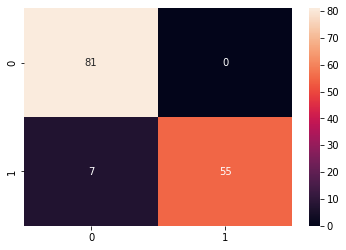

In [ ]:
print(cm)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,predictions))

0.951048951048951


In [ ]:
print(Y_test)

[0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1
 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1]


In [ ]:
print(predictions)

[0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1
 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1]
